In [1]:
#import libraries which we’ll be using in our movie recommendation system

import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from tkinter import *
from tkinter import messagebox

In [2]:
#added the dataset

movies = pd.read_csv("Movie_Id_Titles.csv")
ratings = pd.read_csv("Dataset.csv")

In [3]:
final_dataset = ratings .pivot(index='item_id', columns='user_id', values='rating')
final_dataset.fillna(0, inplace=True)

In [4]:
no_user_voted = ratings.groupby('item_id')['rating'].agg('count')
no_movies_voted = ratings.groupby('user_id')['rating'].agg('count')

In [5]:
def get_the_plot1():
    x, y = plt.subplots(1, 1, figsize=(16, 4))
    plt.scatter(no_user_voted.index, no_user_voted, color='lightblue')
    plt.axhline(y=10, color='r')
    plt.xlabel('item_id')
    plt.ylabel('Num. of users voted')
    plt.title('the plot of users voted')
    plt.show()

In [6]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index, :]

In [7]:
def get_the_plot2():
    x, y = plt.subplots(1, 1, figsize=(16, 4))
    plt.scatter(no_movies_voted.index, no_movies_voted, color='lightblue')
    plt.axhline(y=50, color='r')
    plt.xlabel('user_id')
    plt.ylabel('Num. of votes by user')
    plt.title('the plot of movies are voted by user')
    plt.show()

In [8]:
final_dataset = final_dataset.loc[:, no_movies_voted[no_movies_voted > 50].index]

In [9]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [13]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)


In [14]:
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [15]:
def get_movie_recommendation():
    movie_name = text.get()
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['item_id']
        movie_idx = final_dataset[final_dataset['item_id'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['item_id']
            idx = movies[movies['item_id'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        canvas.create_text(380, 200, text="Recommended movies to watch",fill = "white",font=("Arial", 20))
        canvas.create_text(380, 400, text=df, fill="white", font=("Arial", 20))
    else:
        messagebox.showinfo(title="error", message="No movies found. Please check your input")

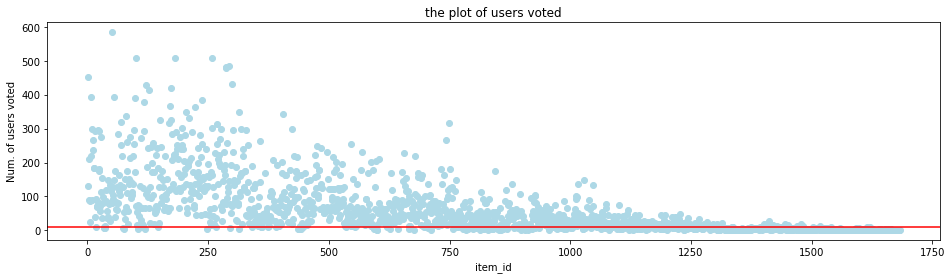

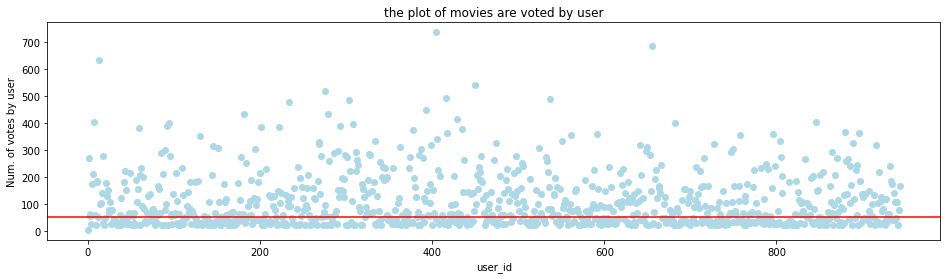

In [17]:
#GUI

window = Tk()
window.geometry("1000x800+200+30")
window.title("Moives Recomended System")
bg = PhotoImage(file="gui_image.gif")
canvas = Canvas(window)
canvas.create_image(0,0,image=bg, anchor=NW)
canvas.pack(fill="both" , expand=True)
canvas.create_text(500, 50,text="Moives Recomended System" , fill="white", font=("Arial", 25, "bold"))
canvas.create_text(150, 153, text="Movie's Name : " , fill="white", font=("Arial", 15))
text = StringVar()
input = Entry(textvariable=text,width=17 ,font=("Arial"))
canvas.create_window(230, 140, anchor=NW, window=input)
btn1 = Button(text="Search" , relief=GROOVE , cursor="hand2",width=10, bg="white", fg="black",command=get_movie_recommendation,
             activebackground="black", activeforeground="white", bd=3, font=("Arial", 15))
btn2 = Button(text="The Plot Of Movies are Voted By User" , relief=GROOVE , cursor="hand2", bg="black", fg="white",command = get_the_plot2,
             activebackground="white", activeforeground="black", bd=3, font=("Arial", 15))
btn3 = Button(text="The Plot Of User Voted" , relief=GROOVE , cursor="hand2", bg="black", fg="white", command = get_the_plot1 ,
             activebackground="white", activeforeground="black", bd=3, font=("Arial", 15))
canvas.create_window(500,130,anchor=NW , window=btn1)
canvas.create_window(550,650,anchor=NW , window=btn2)
canvas.create_window(100,650,anchor=NW , window=btn3);

window.mainloop()